# Business Understanding

A concrete column is a vertical or inclined compression member used for transferring superstructure load to the foundation.

Increasing the lifespan of a concrete column involves various measures that can improve its durability and resistance to degradation over time. Some of the factors to be consider to find the compressive strength of concrete column.

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

## Importing  Libraries 

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
sc=StandardScaler()
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
from sklearn.svm import SVR
svr = SVR()
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score, f1_score,confusion_matrix,mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
dc = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.svm import SVR
svr = SVR()


## Loading Data

In [30]:
df = pd.read_csv("Concrete_Data_Yeh.csv")

In [31]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [32]:
df.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


## Column Descriptions

**Cement** = Quantity of cement used.

**Slag** = Byproduct of steel industry.

**Flyash** = Byproduct of coal combustion.

**Water** = Water added.

**Superplasticizer** = Chemical admixture used in concrete to improve its workability.

**Coarseaggregate** = Made up of various sizes of crushed stone.

**Fineaggregate** = It is responsible for filling the voids between the larger coarse aggregate particles and binding them together.

**Age** = Age of columns.

## Data Dimension 

In [33]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))

Number of Rows: 1030
Number of Cols: 9


## Data Types and Structure


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Check NA 

In [35]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

## Numerical Attributes

In [36]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Frequency Distribution

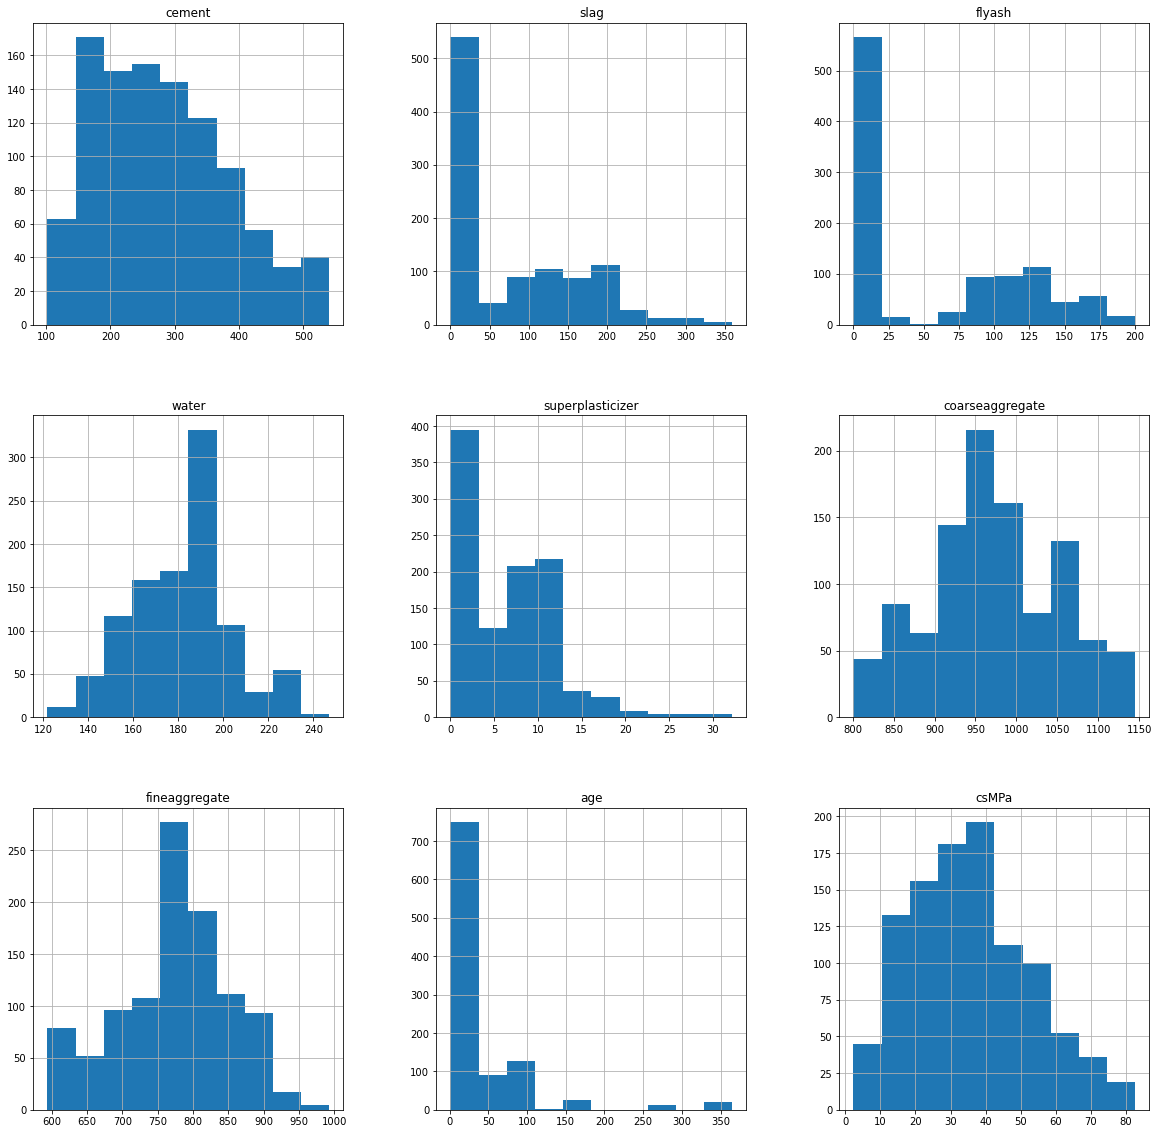

In [37]:
df.hist(figsize = (20,20))
plt.show()

* The frequency distribution graph clearly indicates the **presence of outliers in slag, superplasticizer, and age.**
* The **IQR (Interquartile Range) method** is employed **for the removal of outliers.**

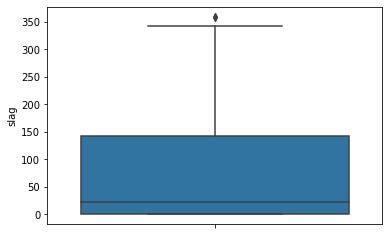

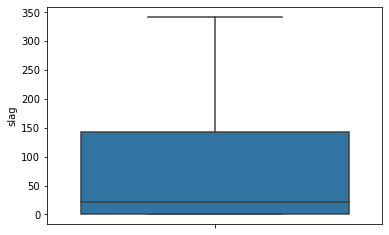

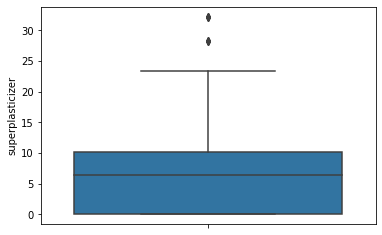

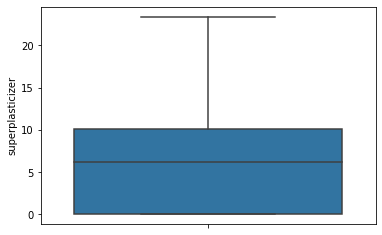

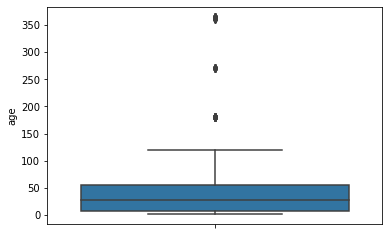

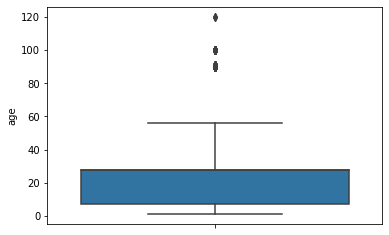

In [38]:
colm=["slag","superplasticizer","age"]
for c in colm:
  plt.figure()
  sns.boxplot(y=c,data=df)
  percentile25=df[c].quantile(0.25)
  percentile75=df[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df=df[(df[c]<=upper_limit) & (df[c]>=lower_limit)]
  plt.figure()
  sns.boxplot(y=c,data=df)

## Bi-Variable Analysis

In [75]:
correlations = df.corr()['csMPa'].drop('csMPa')
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

age                 0.522018
cement              0.483548
superplasticizer    0.429464
water               0.402482
coarseaggregate     0.212712
slag                0.154848
fineaggregate       0.138130
flyash              0.043928
Name: csMPa, dtype: float64

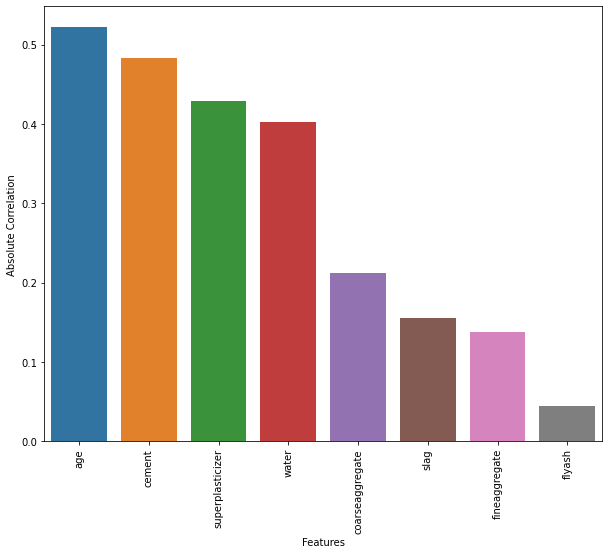

In [76]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

* The graph demonstrates a **strong correlation between age and cement.**

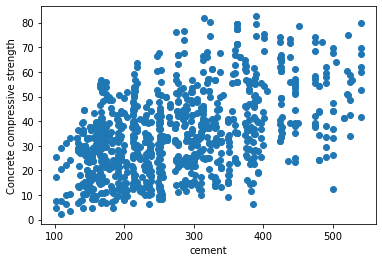

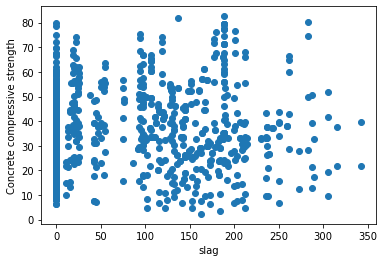

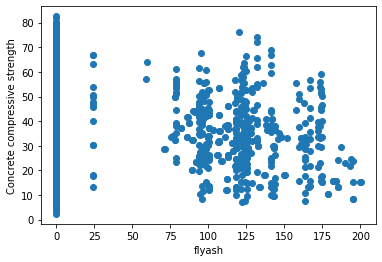

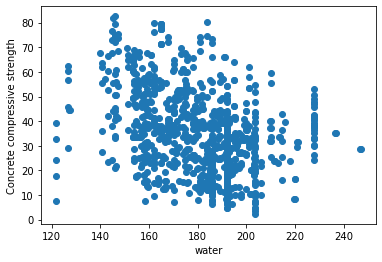

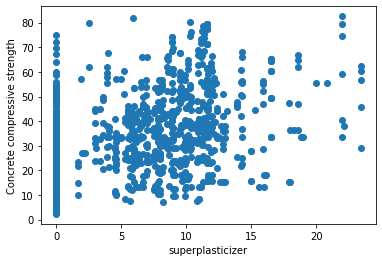

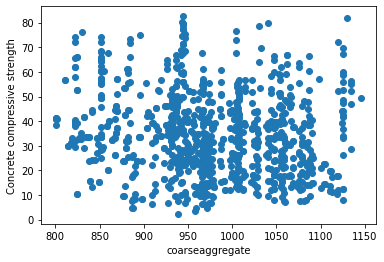

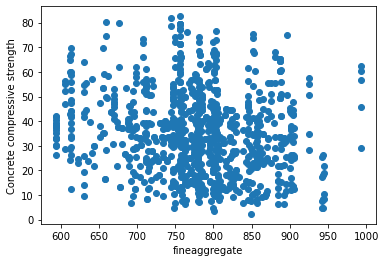

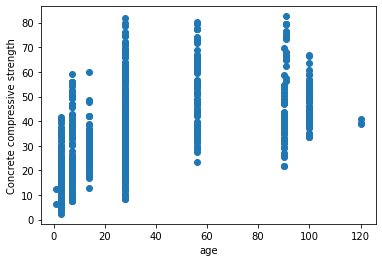

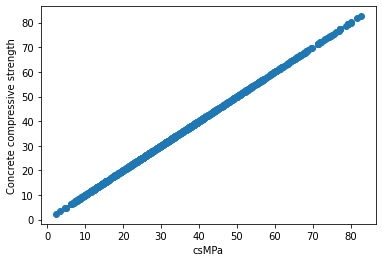

In [39]:
for i in df.columns:
    plt.scatter(df[i], df['csMPa'])
    plt.xlabel(i)
    plt.ylabel('Concrete compressive strength')
    plt.show()

In [41]:
from scipy.stats import chi2_contingency

In [42]:
df1 = pd.crosstab(df['age'], df['csMPa'])
chi2, p, dof, expected = chi2_contingency(df1)
print('Chi-square test statistic:', chi2)
print('p-value:', p)

Chi-square test statistic: 7604.43271606481
p-value: 4.610271828048532e-05


# Data Preparation 

## Spliting into Train, Test Data

In [77]:
X=df.drop(columns=['csMPa']).values
Y=df['csMPa'].values

In [78]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

In [80]:
X_train=sc.fit_transform(X_train)

In [81]:
X_test=sc.transform(X_test)

In [83]:
reg.fit(X_train,Y_train)

LinearRegression()

In [86]:
Y_pred=reg.predict(X_test)

In [89]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error    :', rmse)
msr = metrics.r2_score(Y_test, Y_pred)
print('Mean Squared Error    :',msr)

Root Mean Squared Error    : 7.8760468580008745
Mean Squared Error    : 0.7982114192399796


# Decision Tree

In [66]:
dc.fit(X_train, Y_train)

DecisionTreeRegressor()

In [67]:
y_pred = dc.predict(X_test)

In [96]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', rmse)
msr = metrics.r2_score(Y_test, Y_pred)
print('Mean Squared Error    :',msr)

Root Mean Squared Error: 5.898339400643641
Mean Squared Error    : 0.7982114192399796


# Random Forest

In [71]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [101]:
rf=RandomForestClassifier()

In [103]:
rf_model = RandomForestRegressor(random_state=0)

In [107]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [108]:
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8790384633040116


In [109]:
best_rf_model = RandomForestRegressor(**grid_search.best_params_, random_state=0)

In [110]:
best_rf_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=0)

In [111]:
y1_pred = best_rf_model.predict(X_test)

In [112]:
rmse = np.sqrt(mean_squared_error(Y_test, y1_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 4.652726637406171


# Support Vector Machine (SVM)

In [114]:
svr.fit(X_train, Y_train)

SVR()

In [115]:
svr_pred = svr.predict(X_test)

In [118]:
svr_mse = mean_squared_error(Y_test, svr_pred)
svr_mae = mean_absolute_error(Y_test, svr_pred)
svr_r2 = r2_score(Y_test, svr_pred)
print("Support Vector Regression (SVR):")
print("Mean Squared Error: ", svr_mse)
print("Mean Absolute Error: ", svr_mae)
print("Root Mean Squared Error: ", svr_r2)


Support Vector Regression (SVR):
Mean Squared Error:  90.8827979811745
Mean Absolute Error:  7.1433586062706995
Root Mean Squared Error:  0.7043610219737083


# Grid Search CV

In [119]:
n_estimators = [20,60,100,120]

max_features = [0.2,0.6,1.0]

max_depth = [2,8,None]

max_samples = [0.5,0.75,1.0]


In [120]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'max_samples':max_samples}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [121]:
rf = RandomForestRegressor()

In [123]:
rfgrid = GridSearchCV(estimator = rf,
                     param_grid = param_grid,
                     cv=5,
                     verbose=2,
                     n_jobs=-1)

In [124]:
rfgrid.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [125]:
rfgrid.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 120}

In [126]:
rfgrid.best_score_

0.8819837693829848

In [127]:
y_pred = rfgrid.predict(X_test)

In [128]:
r2 = r2_score(Y_test, y_pred)
print("Root Mean Squared Error:",r2)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:",mse)

Root Mean Squared Error: 0.9282981947166778
Mean Squared Error: 22.041953763857748


# Polynomial regression model

In [130]:
poly = PolynomialFeatures(degree=2)

In [131]:
X_poly = poly.fit_transform(X_train)

In [132]:
poly_model = RandomForestRegressor()
poly_model.fit(X_poly, Y_train)

RandomForestRegressor()

In [133]:
X_test_poly = poly.fit_transform(X_test)
y_pred = poly_model.predict(X_test_poly)

In [134]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", r2)

Mean Squared Error: 26.008280822691628
Mean Absolute Error: 3.6561570768799077
Root Mean Squared Error: 0.915395853412941
